# Hemocyanin from PDB

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries Used</a></span></li><li><span><a href="#Fasta-Loading-and-Alignment" data-toc-modified-id="Fasta-Loading-and-Alignment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fasta Loading and Alignment</a></span><ul class="toc-item"><li><span><a href="#Load-Amino-Acids" data-toc-modified-id="Load-Amino-Acids-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load Amino Acids</a></span></li><li><span><a href="#Exploratory-Data-Analysis-I" data-toc-modified-id="Exploratory-Data-Analysis-I-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exploratory Data Analysis I</a></span><ul class="toc-item"><li><span><a href="#Load-the-fasta-files" data-toc-modified-id="Load-the-fasta-files-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Load the fasta files</a></span></li><li><span><a href="#Build-frames-for-later-analysis" data-toc-modified-id="Build-frames-for-later-analysis-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Build frames for later analysis</a></span></li><li><span><a href="#View-proteins-as-dataframe" data-toc-modified-id="View-proteins-as-dataframe-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>View proteins as dataframe</a></span></li><li><span><a href="#Distributions" data-toc-modified-id="Distributions-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Distributions</a></span></li></ul></li><li><span><a href="#Initial-Considerations" data-toc-modified-id="Initial-Considerations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initial Considerations</a></span><ul class="toc-item"><li><span><a href="#2N1C:A" data-toc-modified-id="2N1C:A-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>2N1C:A</a></span></li><li><span><a href="#2N30:A" data-toc-modified-id="2N30:A-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>2N30:A</a></span></li><li><span><a href="#Removal-of-2N30-and-2N1C" data-toc-modified-id="Removal-of-2N30-and-2N1C-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Removal of 2N30 and 2N1C</a></span></li></ul></li><li><span><a href="#Protein-Frames" data-toc-modified-id="Protein-Frames-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Protein Frames</a></span></li><li><span><a href="#Align-fasta-files-for-Hemocyanin-results" data-toc-modified-id="Align-fasta-files-for-Hemocyanin-results-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Align fasta files for Hemocyanin results</a></span></li></ul></li></ul></div>

## Introduction

The main purpose of this notebook is to organize protein information downloaded from RCSB.org

## Libraries Used

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from Bio import AlignIO, SeqIO
from glob import glob

## Fasta Loading and Alignment

### Load Amino Acids

I made a little CSV with many amino acid properties. First this information will be loaded. For the first section of this notebook, we will only be using the letters.

In [75]:
amino_acids = pd.read_csv('AminoAcids.csv', index_col=0, squeeze=True).T
# Since this is a CSV we need to evaluate the codon string
for amino in amino_acids:
    amino_acids[amino]["codons"] = eval(amino_acids[amino]["codons"])

A useful reference.

In [76]:
amino_acids.T

,amino_acid,code,composition,smiles,codons,isoelectric,carb_pKa,amino_pKa,side_pKa,polarity,mono_mass,avg_mass,cid_number,properties
letter,,,,,,,,,,,,,,
A,alanine,ala,C3H5NO,CC(C(=O)O)N,"{GCU, GCC, GCA, GCG}",6.01,2.35,9.87,-,non,71.03711381,71.0779,CID5950,"{""aliphatic""}"
R,arginine,arg,C6H12N4O,NC(CCCN=C(N)N)C(O)=O,"{AGA, AGG, CGA, CGG, CGC, CGU}",10.76,1.8,8.99,12.48,basic,156.1011111,156.18568,CID6322,"{""hydrophilic"",""basic""}"
N,asparagine,asn,C4H6N2O2,C(C(C(=O)O)N)C(=O)N,"{AAC, AAU}",5.41,2.14,8.72,-,polar,114.0429275,114.10264,CID236,"{""non-charged"",""amidic""}"
D,aspartic acid,asp,C4H5NO3,C(C(C(=O)O)N)C(=O)O,"{GAU, GAC}",2.85,1.99,9.9,3.9,acidic,115.0269431,115.0874,CID5960,"{""hydrophilic"",""acidic""}"
C,cysteine,cys,C3H5NOS,C(C(C(=O)O)N)S,"{UGU, UGC}",5.05,1.92,10.7,8.18,non,103.0091845,103.1429,CID5862,"{""non-charged"",""sulfur""}"
E,glutamic acid,glu,C5H7NO3,C(CC(=O)O)C(C(=O)O)N,"{GAA, GAG}",3.15,2.1,9.47,4.07,acidic,129.0425931,129.11398,CID33032,"{""hydrophilic"", ""acidic""}"
Q,glutamine,gln,C5H8N2O2,C(CC(=O)N)C(C(=O)[O-])[NH3+],"{CAG, CAA}",5.65,2.17,9.13,-,polar,128.0585775,128.12922,CID6992086,"{""non-charged"", ""amidic""}"
G,glycine,gly,C2H3NO,C(C(=O)O)N,"{GGA, GGC, GGU, GGG}",6.06,2.35,9.78,-,non,57.02146374,57.05132,CID750,"{""aliphatic""}"
H,histidine,his,C6H7N3O,C1=C(NC=N1)CC(C(=O)O)N,"{CAC, CAU}",7.60,1.8,9.33,6.04,basic,137.0589119,137.13928,CID6274,"{""hydrophilic"",""basic""}"


In [77]:
amino_letters = sorted(list(amino_acids.T.index))[1:]
amino_letters.insert(0, "-")
amino_letters[3]

'D'

### Exploratory Data Analysis I

#### Load the fasta files

In [130]:
from Bio import SeqIO

proteins = {}
for record in SeqIO.parse("rcsb_model.fasta", "fasta"):
    # Create an empty dictionary to populate
    proteins[record.id.split("|")[0]] = {}
    entry = proteins[record.id.split("|")[0]]
    
    # Set values to explore
    entry["sequence"] = record.id.split("|")[0]
    entry["family"]  = entry["sequence"].split(":")[0]
    entry["unit"]    = entry["sequence"].split(":")[1]
    entry["protein"] = str(record.seq)
    entry["length"]  = len(entry["protein"])

#### Build frames for later analysis

In [143]:
for protein in proteins:
    entry = proteins[protein]
    for i in range(1,20):
        for j in range(i, entry["length"] - i):
            entry["{}_{}".format(i,j - i)] = entry["protein"][j - i:j]

In [146]:
proteins["3IXV:D"]["length"]

626

#### View proteins as dataframe

In [149]:
proteins = pd.DataFrame.from_dict(proteins).T
proteins[["sequence", "family", "protein", "5_0"]]

,sequence,family,protein,5_0
1HC1:A,1HC1:A,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:B,1HC1:B,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:C,1HC1:C,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:D,1HC1:D,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
1HC1:E,1HC1:E,1HC1,DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...,DALGT
...,...,...,...,...
6R83:5a,6R83:5a,6R83,NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...,NLLRK
6R83:6a,6R83:6a,6R83,NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...,NLLRK
6R83:7a,6R83:7a,6R83,NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...,NLLRK
6R83:8a,6R83:8a,6R83,NLLRKNVDTLTPDEILNLQVSLRAMQDDEGASGYQAISAYHGEPAD...,NLLRK


#### Distributions 

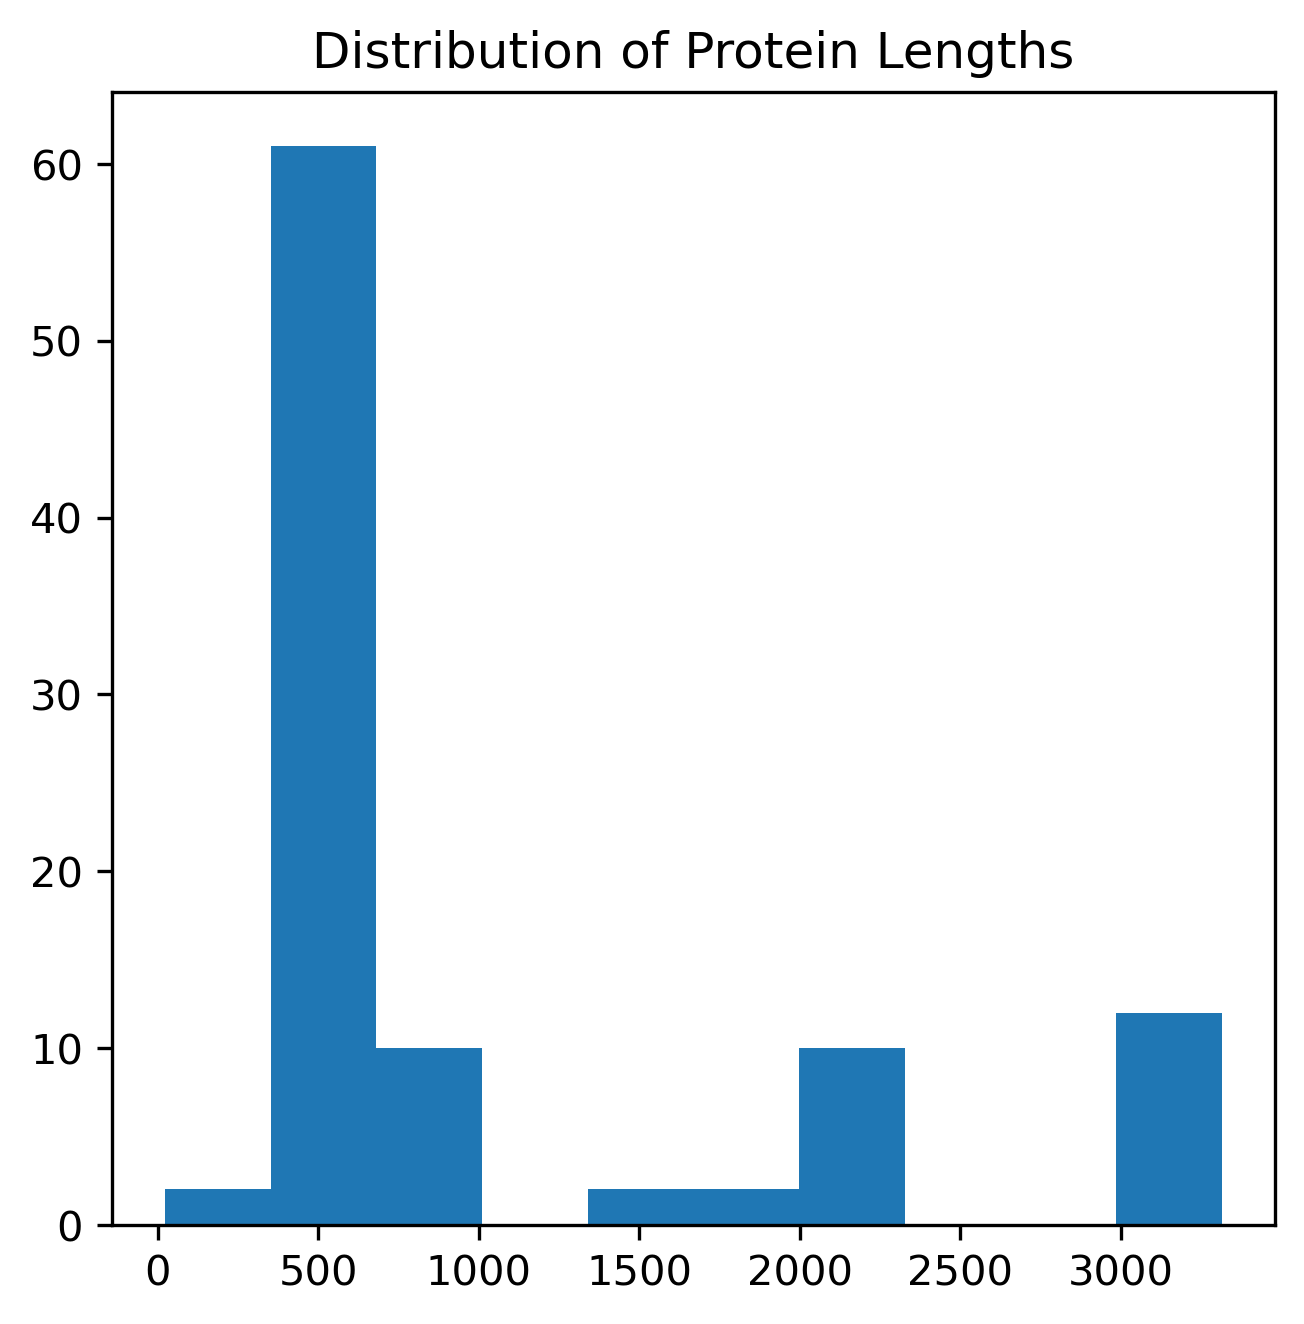

In [150]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

In [152]:
proteins[proteins["length"] < 150]["length"]

2N1C:A    23
2N30:A    25
Name: length, dtype: object

### Initial Considerations

2N1C and 2N30 are both of very small proteins, which are probably the derivatives of other structures. Before removing them from consideration, however, it is probably best to review each.

#### 2N1C:A

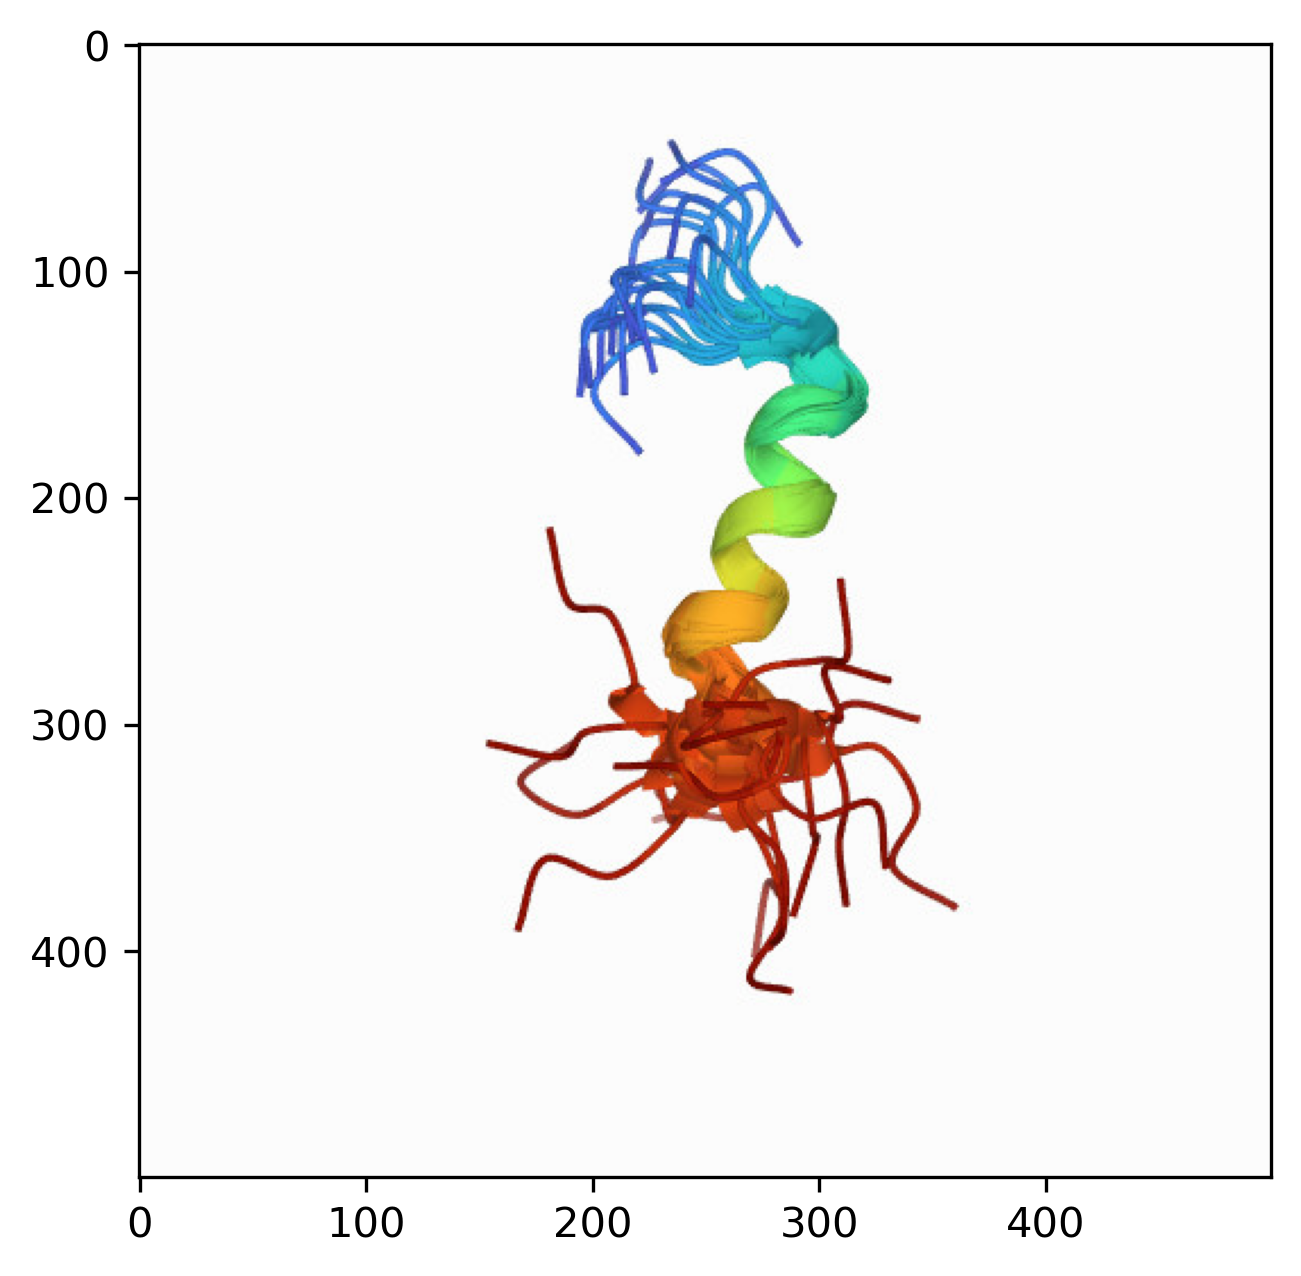

In [108]:
image = mpimg.imread("2n1c_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

#### 2N30:A

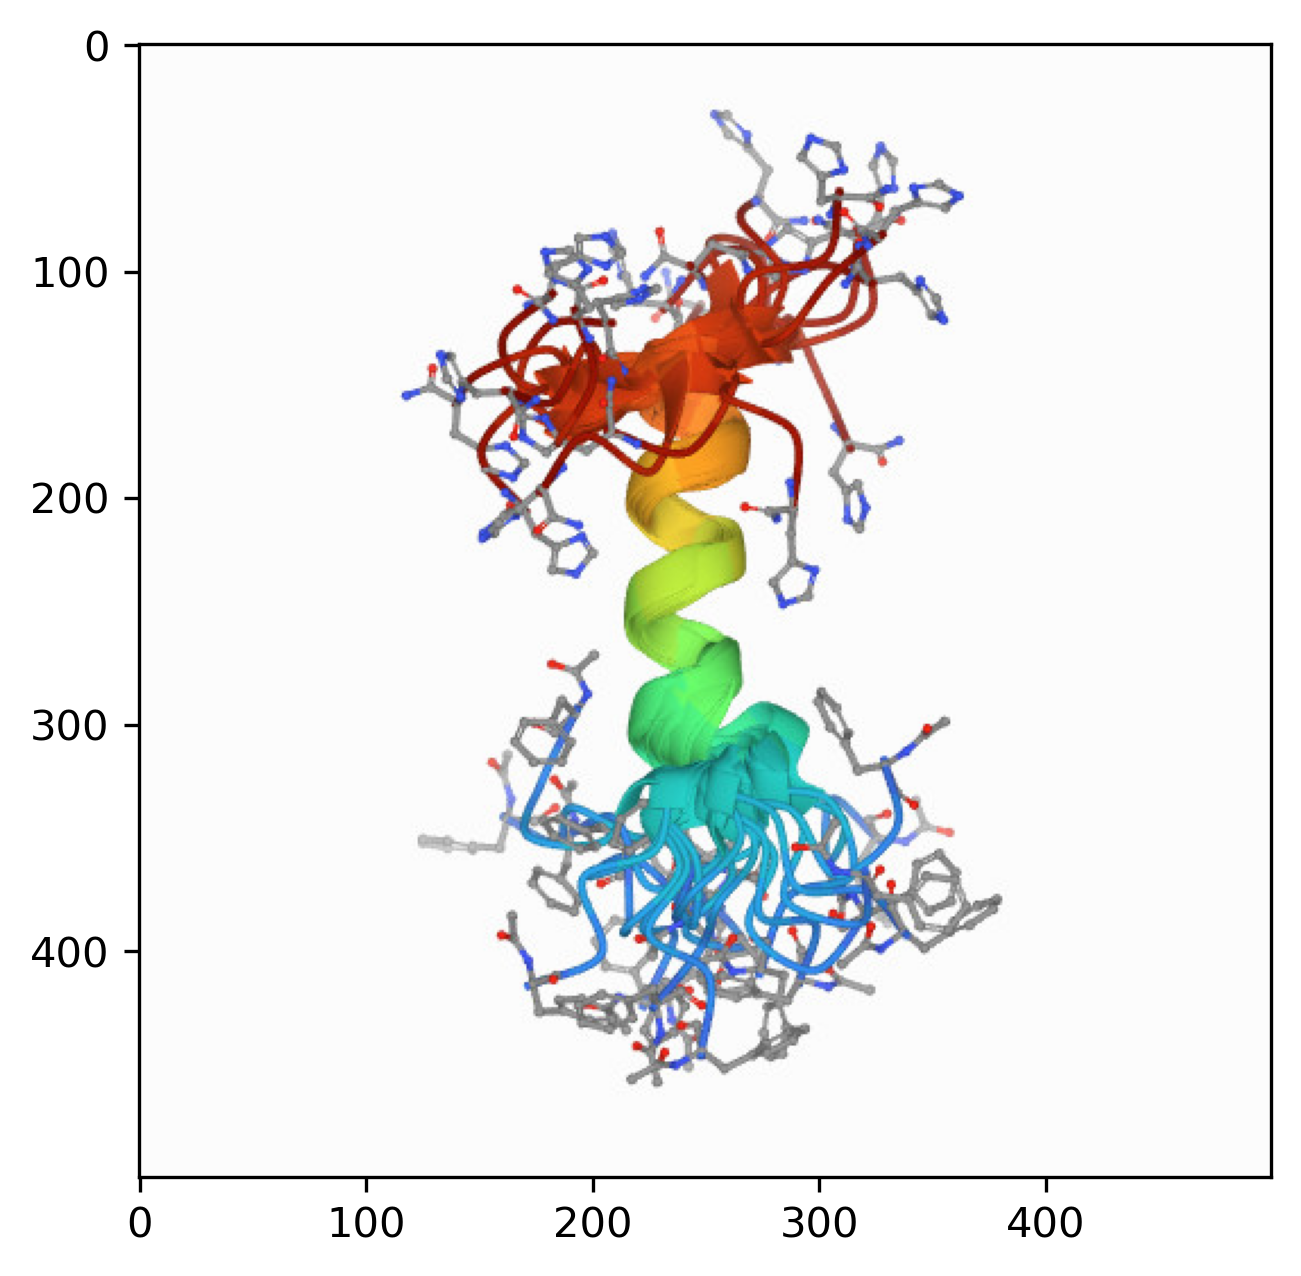

In [109]:
image = mpimg.imread("2n30_models.jpeg")
plt.figure(figsize=(5,5), dpi =300);
plt.imshow(image);
plt.show();

Both of these proteins are derived from crustacean hemocyanins as an anitfungal agents [1]. Thus it seems reasonable to omit it from the analysis

[1] Petit, Vanessa W., et. al. "A Hemocyanin-derived Antimicrobial Peptide from the Penaeid Shrimp Adopts an Alpha-helical Structure That Specifically Permeabilizes Fungal Membranes." Biochimica Et Biophysica Acta (BBA) - General Subjects 1860.3 (2016): 557-68. Print.

#### Removal of 2N30 and 2N1C

In [110]:
proteins.drop(["2N1C:A", "2N30:A"], inplace = True)

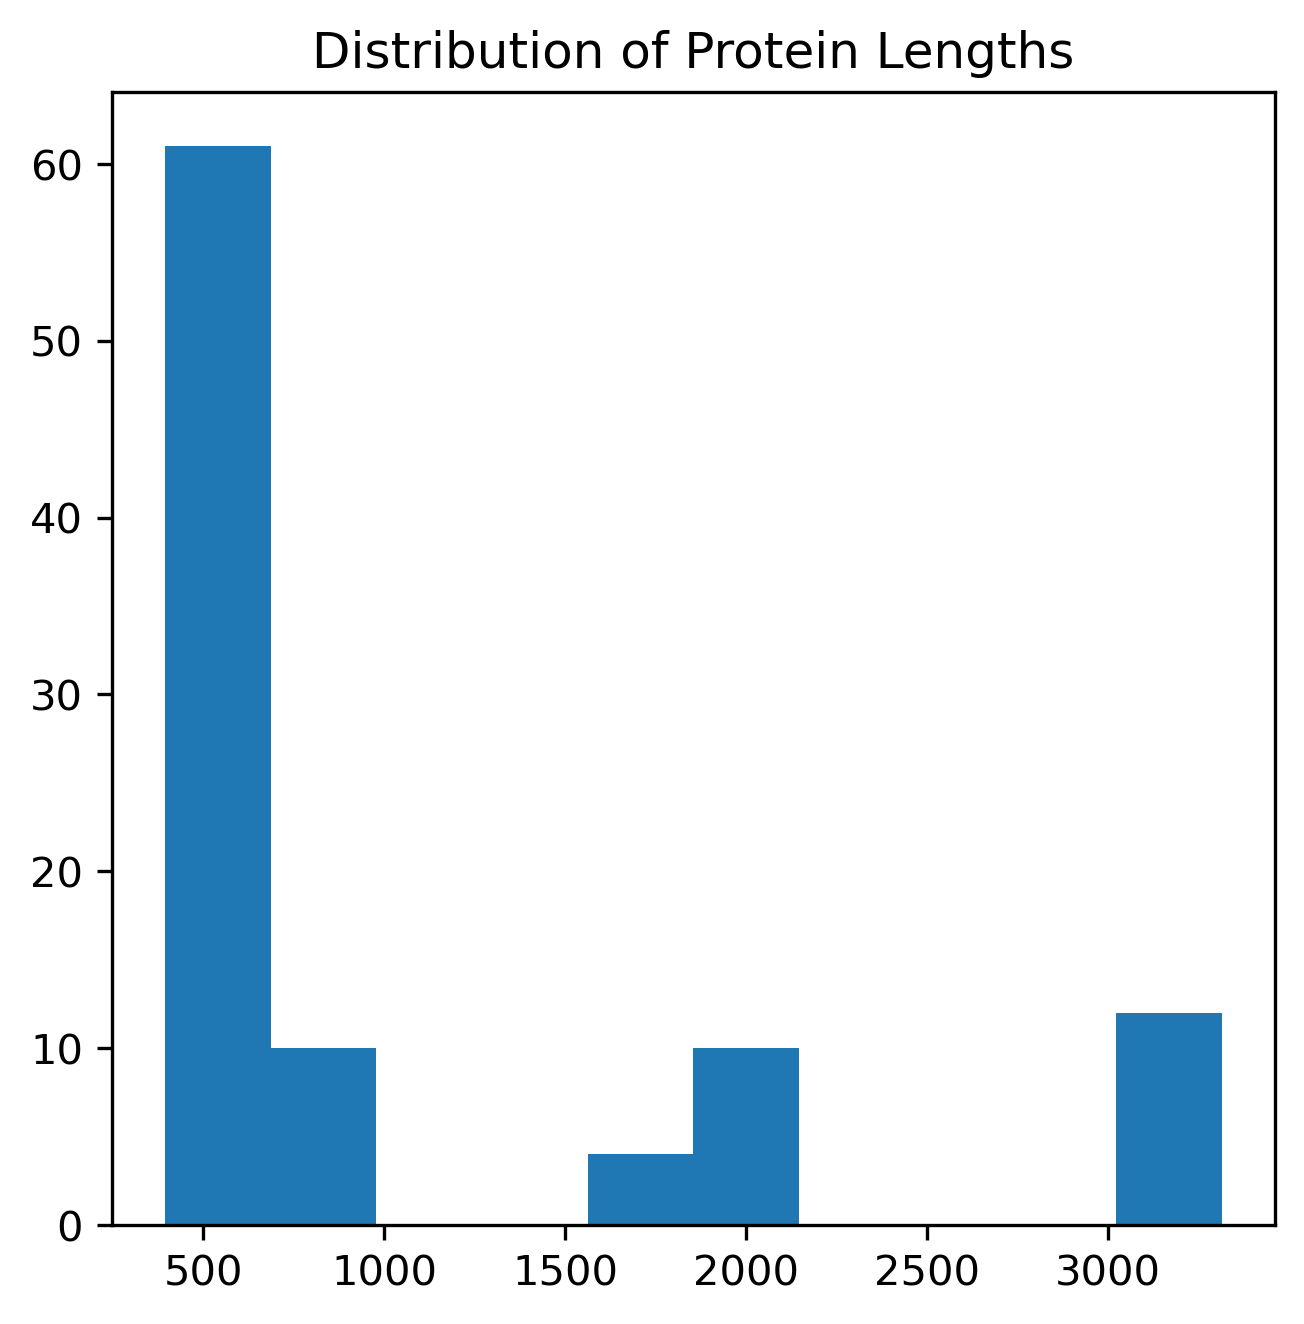

In [111]:
plt.figure(figsize=(5,5), dpi =300);
plt.hist(proteins["length"], bins = 10);
plt.title("Distribution of Protein Lengths");
plt.show()

In [155]:
proteins.loc['1HCY:D']'1_0', '1_1', '1_2',
       '1_3', '1_4',
       ...
       '19_3266', '19_3267', '19_3268', '19_3269', '19_3270', '19_3271',
       '19_3272', '19_3273', '19_3274', '19_3275']

sequence                                               1HCY:D
family                                                   1HCY
unit                                                        D
protein     DALGTGNAQKQQDINHLLDKIYEPTKYPDLKDIAENFNPLGDTSIY...
length                                                    657
                                  ...                        
19_3271                                                     -
19_3272                                                     -
19_3273                                                     -
19_3274                                                     -
19_3275                                                     -
Name: 1HCY:D, Length: 62591, dtype: object

### Protein Frames

In [154]:
proteins = proteins.fillna("-")

These are the frame columns in the protein set

In [175]:
proteins.columns[[5,-1]]

Index(['1_0', '19_3275'], dtype='object')

In [179]:
proteins[proteins.columns[5]].value_counts()

T    27
N    20
D    14
S    11
Y    10
A     4
I     4
G     3
V     2
E     2
F     1
X     1
Name: 1_0, dtype: int64

I am interested in 

In [178]:
protein_frames = {}
for frame in proteins.columns[5:]:
    pass
print(frame)

19_3275


### Align fasta files for Hemocyanin results

In [10]:
# These fasta files are all combined, but if they 
# Were separate, we could use fasta in glob("*.fasta"):

fasta = "rcsb_model.fasta"
with open("rcsb_model.fasta") as f:
    # Set output file name
    aligned_output = "{}-aligned.fasta".format(fasta)

    # Apply MAFFT alignement
    from Bio.Align.Applications import MafftCommandline
    mafft_cline = MafftCommandline(input= str(fasta))
    aligned, report = mafft_cline()
    
    # Uncomment to view MAFFT report
    # print(report)
    with open(aligned_output, "w") as handle:
        handle.write(aligned)

nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 22 ambiguous characters.

    1 / 99
done.

Constructing a UPGMA tree (efffree=0) ... 

    0 / 99
   10 / 99
   20 / 99
   30 / 99
   40 / 99
   50 / 99
   60 / 99
   70 / 99
   80 / 99
   90 / 99
done.

Progressive alignment 1/2... 

STEP     1 / 98  f
STEP     2 / 98  f
STEP     3 / 98  f
STEP     4 / 98  f
STEP     5 / 98  f
STEP     6 / 98  f
STEP     7 / 98  f
STEP     8 / 98  f
STEP     9 / 98  f
STEP    10 / 98  f
STEP    11 / 98  f
STEP    12 / 98  f
STEP    13 / 98  f
STEP    14 / 98  f
STEP    15 / 98  f
STEP    16 / 98  f
STEP    17 / 98  f
STEP    18 / 98  f
STEP    19 / 98  f
STEP    20 / 98  f
STEP    21 / 98  f
STEP    22 / 98  f
STEP    23 / 98  f
STEP    24 / 98  f
STEP    25 / 98  f
STEP    26 / 98  f
STEP    27 / 98  f
STEP    28 / 98  f
STEP    29 